In [13]:
# import 
 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.font_manager as fm # font 설정


In [14]:
import matplotlib as mpl


######## 한글 폰트 사용을 위한 설정 ######## 
font_path = "C:/Windows/Fonts/gulim.ttc"  # 사용할 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12) # 폰트 속성 객체 생성
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib 전역 폰트 설정 

In [15]:
# 2. Load
df = pd.read_csv('../data/after_scaling.csv')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school_GP     357 non-null    int64  
 1   school_MS     357 non-null    int64  
 2   fromCity      357 non-null    int64  
 3   sex           357 non-null    int64  
 4   age           357 non-null    int64  
 5   famMore3      357 non-null    int64  
 6   liveTogether  357 non-null    int64  
 7   Medu          357 non-null    int64  
 8   Fedu          357 non-null    int64  
 9   noParent      357 non-null    int64  
 10  traveltime    357 non-null    int64  
 11  studytime     357 non-null    int64  
 12  failures      357 non-null    int64  
 13  schoolsup     357 non-null    int64  
 14  famsup        357 non-null    int64  
 15  paid          357 non-null    int64  
 16  activities    357 non-null    int64  
 17  nursery       357 non-null    int64  
 18  higher        357 non-null    

,school_GP,school_MS,fromCity,sex,age,famMore3,liveTogether,Medu,Fedu,noParent,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,323.000000,323.000000,323.000000
mean,0.882353,0.117647,0.781513,0.481793,16.655462,0.700280,0.890756,2.795518,2.546218,0.075630,...,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,-0.009431,0.007083,-0.001143
std,0.322642,0.322642,0.413800,0.500370,1.268262,0.458778,0.312383,1.093999,1.084217,0.264777,...,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,1.019525,1.021119,1.028471
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.555359,-2.023224,-2.334214
25%,1.000000,0.000000,1.000000,0.000000,16.000000,0.000000,1.000000,2.000000,2.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,-0.701165,-0.750465,-0.782996
50%,1.000000,0.000000,1.000000,0.000000,17.000000,1.000000,1.000000,3.000000,3.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,-0.083101,-0.114085,-0.162509
75%,1.000000,0.000000,1.000000,1.000000,18.000000,1.000000,1.000000,4.000000,3.000000,0.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,0.843995,0.840485,0.768222
max,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,2.389156,2.431434,2.629684


In [16]:
# 결측치 확인
df_null = df.isnull().sum()
print("컬럼별 결측치 개수:\n", df_null)

컬럼별 결측치 개수:
 school_GP        0
school_MS        0
fromCity         0
sex              0
age              0
famMore3         0
liveTogether     0
Medu             0
Fedu             0
noParent         0
traveltime       0
studytime        0
failures         0
schoolsup        0
famsup           0
paid             0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
Dalc             0
Walc             0
health           0
absences         0
G1              34
G2              34
G3              34
dtype: int64


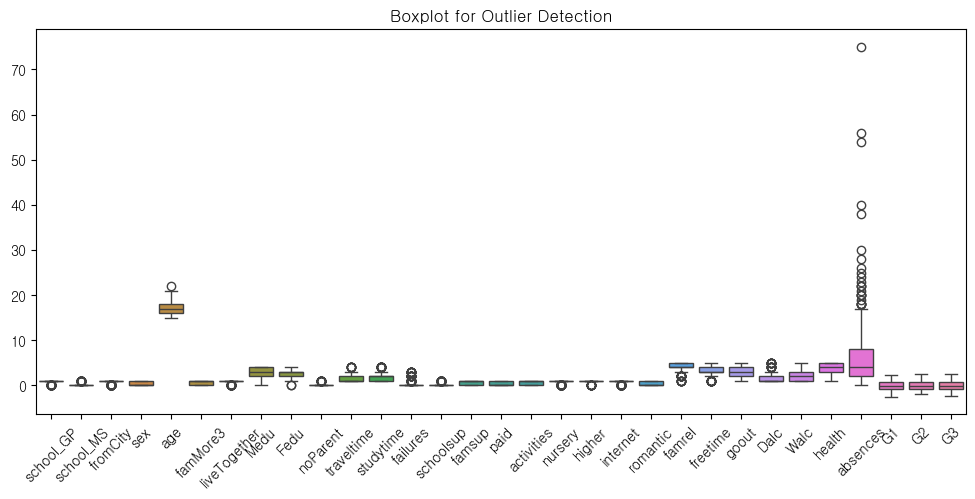

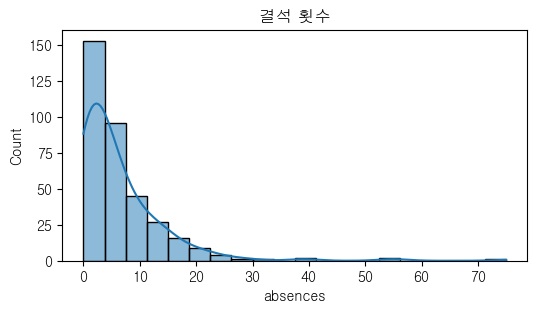

In [17]:
# 수치형 컬럼만 선택
num_cols = df.select_dtypes(include=['int64','float64']).columns

# 박스플롯으로 이상치 확인
plt.figure(figsize=(12,5))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

plt.figure(figsize=(6,3))
sns.histplot(df['absences'], bins=20, kde=True)
plt.title("결석 횟수")
plt.show()


In [18]:
absences = df ['absences']

print(absences.describe())

count    357.000000
mean       6.316527
std        8.187623
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


In [19]:
G3 = df['G3']

print(G3.describe())
G3

count    323.000000
mean      -0.001143
std        1.028471
min       -2.334214
25%       -0.782996
50%       -0.162509
75%        0.768222
max        2.629684
Name: G3, dtype: float64


0     -1.713727
1     -1.713727
2     -0.472752
3      1.078466
4     -0.472752
         ...   
352         NaN
353         NaN
354         NaN
355         NaN
356         NaN
Name: G3, Length: 357, dtype: float64

### 01_성적과 결석의 관계성

features= [
    "G1", "G2", "studytime", "absences", 
    "freetime", "goout", "Dalc", "Walc", "health",
    "Medu", "Fedu", "famsup"
]
target = "G3"

In [20]:
features_1 = ["studytime", "absences", "G1", "G2"]
target = "G3"

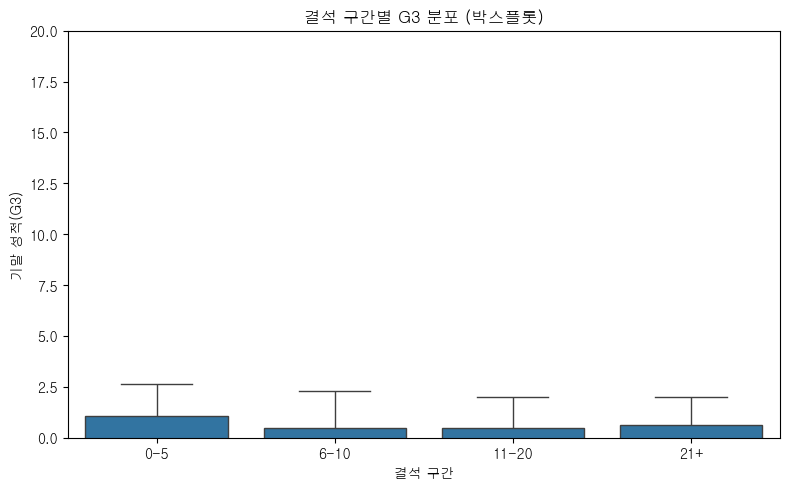

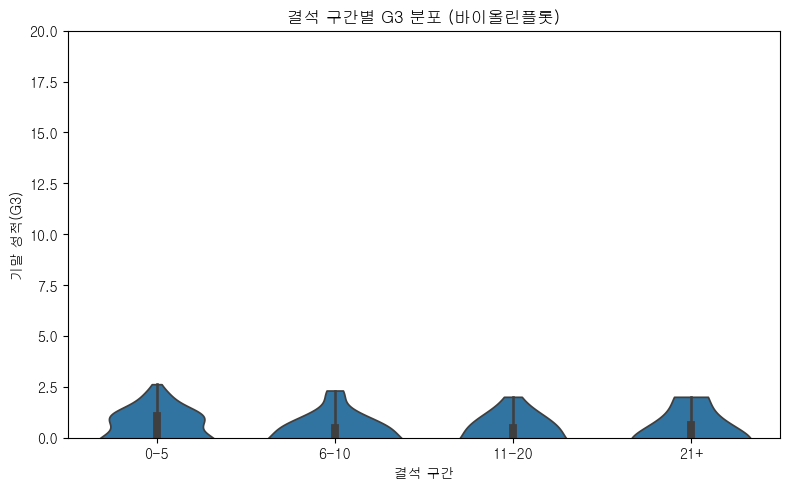

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


tmp = df.copy()
bins = [-1, 5, 10, 20, tmp["absences"].max()]
labels = ["0-5", "6-10", "11-20", "21+"]
tmp["abs_band"] = pd.cut(tmp["absences"], bins=bins, labels=labels, include_lowest=True)

#  박스플롯
plt.figure(figsize=(8,5))
sns.boxplot(x="abs_band", y="G3", data=tmp, order=labels)
plt.xlabel("결석 구간")
plt.ylabel("기말 성적(G3)")
plt.title("결석 구간별 G3 분포 (박스플롯)")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x="abs_band", y="G3", data=tmp, order=labels, inner="box", cut=0)
plt.xlabel("결석 구간")
plt.ylabel("기말 성적(G3)")
plt.title("결석 구간별 G3 분포 (바이올린플롯)")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()


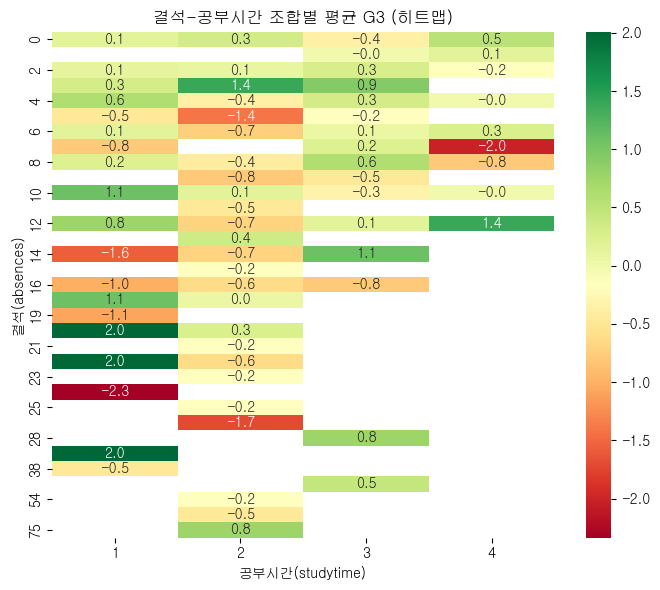

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# studytime이 1~4 범주형이므로 피벗에 적합
pivot_data = df.pivot_table(
    values="G3", index="absences", columns="studytime", aggfunc="mean"
)

plt.figure(figsize=(7,6))
sns.heatmap(pivot_data, cmap="RdYlGn", annot=True, fmt=".1f")
plt.title("결석-공부시간 조합별 평균 G3 (히트맵)")
plt.xlabel("공부시간(studytime)")
plt.ylabel("결석(absences)")
plt.tight_layout()
plt.show()


두 변수의 상호작용 효과 확인 가능

결석이 적을수록 점수가 높고, 공부시간이 늘수록 더 높아지는 조합 효과를 색상으로 한눈에 볼 수 있음.

예: 결석 ↓ + 공부시간 ↑ 구간이 가장 진한 녹색 → 성적이 가장 높은 조합

최적 조건 도출 가능

예: 공부시간 3단계, 결석 0~5회 → G3 평균 15점 이상

이런 식으로 정책 제안용 근거로 쓸 수 있음.

리스크 구간도 바로 보임

예: 결석 20회↑ + 공부시간 1단계 → 평균 7점 이하

학습 개입 필요 학생군을 식별할 수 있음.

“이 히트맵을 보면 공부시간을 늘려도 결석이 많으면 효과가 제한적이라는 걸 알 수 있다.”

“반대로 결석이 적다면 공부시간 증가 효과가 더 크게 나타난다.”

→ 즉, 결석 관리가 우선, 그다음이 공부시간 확보라는 전략적 메시지를 줄 수 있음.